# Assignment Description

<b>Pre Work</b>

1. Visit the following [website](https://excelbianalytics.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/) and explore the range of sizes of this dataset (from 100 to 5 million records).

2. Select 2 files to download  Based on your computer's capabilities (memory, CPU), select 2 files you can handle (recommended one small, one large)

3. Download the files

4. Review the structure and content of the tables, and think about the data sets (structure, size, dependencies, labels, etc)

5. Consider the similarities and differences in the two data sets you have downloaded

6. Think about how to analyze and predict an outcome based on the datasets available

7.  Based on the data you have, think which two machine learning algorithms presented so far could be used to analyze the data

<b>Deliverable</b>

1. Essay (minimum 500 word document)
Write a short essay explaining your selection of algorithms and how they relate to the data and what you are trying to do.
2. Exploratory Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document). Explore how to analyze and predict an outcome based on the data available. This will be an exploratory exercise, so feel free to show errors and warnings that raise during the analysis. Test the code with both datasets selected and compare the results.

Answer questions such as:
- Are the columns of your data correlated?
- Are there labels in your data? Did that impact your choice of algorithm?
- What are the pros and cons of each algorithm you selected?
- How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?
- Which result will you trust if you need to make a business decision?
- Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?
- How does the analysis between data sets compare?


# Imports and Setup

The cell below imports the libraries necessary to run the code used to complete this assignment. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

The cells below read in the data from their respective `.csv` files:

In [2]:
sales = pd.read_csv('1000_Sales_Records.csv')
hr = pd.read_csv('100000_HR_Records.csv')

In [3]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [4]:
hr.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,882966,Mrs.,Gwyn,E,Etzel,F,gwyn.etzel@aol.com,Sebastian Etzel,Joshua Etzel,Marden,...,640-29-9264,405-775-9884,Bromide,Johnston,Bromide,OK,74530,South,geetzel,c@sLdGgxI[sE|aJ
1,189028,Ms.,Ressie,I,Goodwyn,F,ressie.goodwyn@charter.net,Lucien Goodwyn,Sparkle Goodwyn,Lotts,...,375-37-8517,212-786-7533,Reading Center,Schuyler,Reading Center,NY,14876,Northeast,rigoodwyn,51CEPJ]r
2,479122,Mr.,Colton,B,Salzman,M,colton.salzman@hotmail.com,Dennis Salzman,Leesa Salzman,Slattery,...,073-02-5563,385-775-0225,Ibapah,Tooele,Ibapah,UT,84034,West,cbsalzman,l!Hspr@#$Dk7sq
3,484002,Ms.,Marylynn,G,Ealey,F,marylynn.ealey@cox.net,Efren Ealey,Kayleen Ealey,Gandara,...,106-98-7919,216-984-8974,Wickliffe,Lake,Wickliffe,OH,44092,Midwest,mgealey,QeJJ:vj6
4,677207,Ms.,Bula,V,Reich,F,bula.reich@gmail.com,Dominic Reich,Daphne Reich,Lister,...,753-07-4655,217-307-8597,Forrest,Livingston,Forrest,IL,61741,Midwest,bvreich,6_<OFxu\]


# Data Summary

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Emp ID                  100000 non-null  int64  
 1   Name Prefix             100000 non-null  object 
 2   First Name              100000 non-null  object 
 3   Middle Initial          100000 non-null  object 
 4   Last Name               100000 non-null  object 
 5   Gender                  100000 non-null  object 
 6   E Mail                  100000 non-null  object 
 7   Father's Name           100000 non-null  object 
 8   Mother's Name           100000 non-null  object 
 9   Mother's Maiden Name    100000 non-null  object 
 10  Date of Birth           100000 non-null  object 
 11  Time of Birth           100000 non-null  object 
 12  Age in Yrs.             100000 non-null  float64
 13  Weight in Kgs.          100000 non-null  int64  
 14  Date of Joining      

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


# Data Cleaning

In [7]:
# cleaning sales dataset for only those columns needed in prediction

col_list = ['Gender', 'Age in Yrs.', 'Weight in Kgs.', 'Age in Company (Years)',
            'Year of Joining', 'Month of Joining', 'Last % Hike', 'City',
            'State', 'Region', 'Salary']
hr = hr[col_list]
hr['Last % Hike'] = hr['Last % Hike'].str.rstrip("%").astype(float)

In [8]:
# cleaning sales dataset for only those columns needed in prediction

col_list = ['Region', 'Country', 'Sales Channel', 'Order Priority']
sales = sales[col_list]

# EDA

## HR Dataset

In [9]:
hr.describe()

,Age in Yrs.,Weight in Kgs.,Age in Company (Years),Year of Joining,Month of Joining,Last % Hike,Salary
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,40.483717,59.972630,9.714464,2007.368370,6.469070,15.02456,119955.723810
std,11.262914,13.685097,8.550810,8.555491,3.408343,8.93529,46248.133607
min,21.000000,40.000000,0.000000,1978.000000,1.000000,0.00000,40001.000000
25%,30.730000,50.000000,2.630000,2002.000000,4.000000,7.00000,79979.000000
50%,40.470000,57.000000,7.300000,2010.000000,6.000000,15.00000,120174.500000
75%,50.240000,70.000000,14.820000,2014.000000,9.000000,23.00000,159957.000000
max,60.000000,90.000000,38.750000,2017.000000,12.000000,30.00000,199999.000000


Washington          711
Houston             429
New York City       380
El Paso             337
Dallas              327
                   ... 
Baileyton             1
Fall River Mills      1
Dietrich              1
Slickville            1
Humphreys             1
Name: City, Length: 17878, dtype: int64


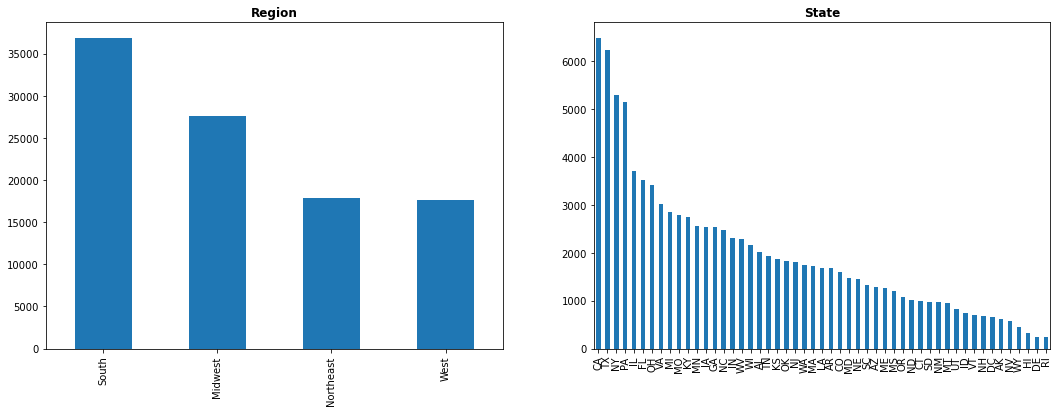

In [10]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.title('Region', fontweight='bold')
hr['Region'].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
plt.title('State', fontweight='bold')
hr['State'].value_counts().plot(kind='bar')

print(hr['City'].value_counts())

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

hr_corr = hr.corr()
sales_corr = sales.corr()

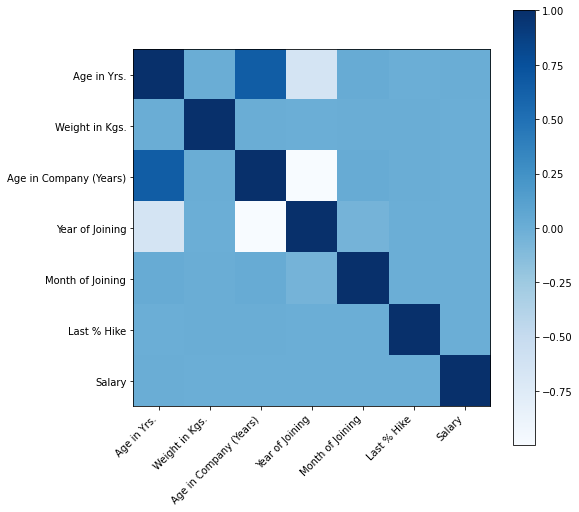

In [12]:
plt.figure(figsize=(8,8))
hr_numeric_cols = hr.select_dtypes(include=numerics).columns
plt.imshow(hr_corr, cmap='Blues')
plt.xticks(range(len(hr_corr)), hr_numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(hr_corr)), hr_numeric_cols)
plt.colorbar()
plt.show()

## Sales Dataset

In [13]:
sales.describe()

,Region,Country,Sales Channel,Order Priority
count,1000,1000,1000,1000
unique,7,185,2,4
top,Europe,Cuba,Offline,L
freq,267,11,520,268


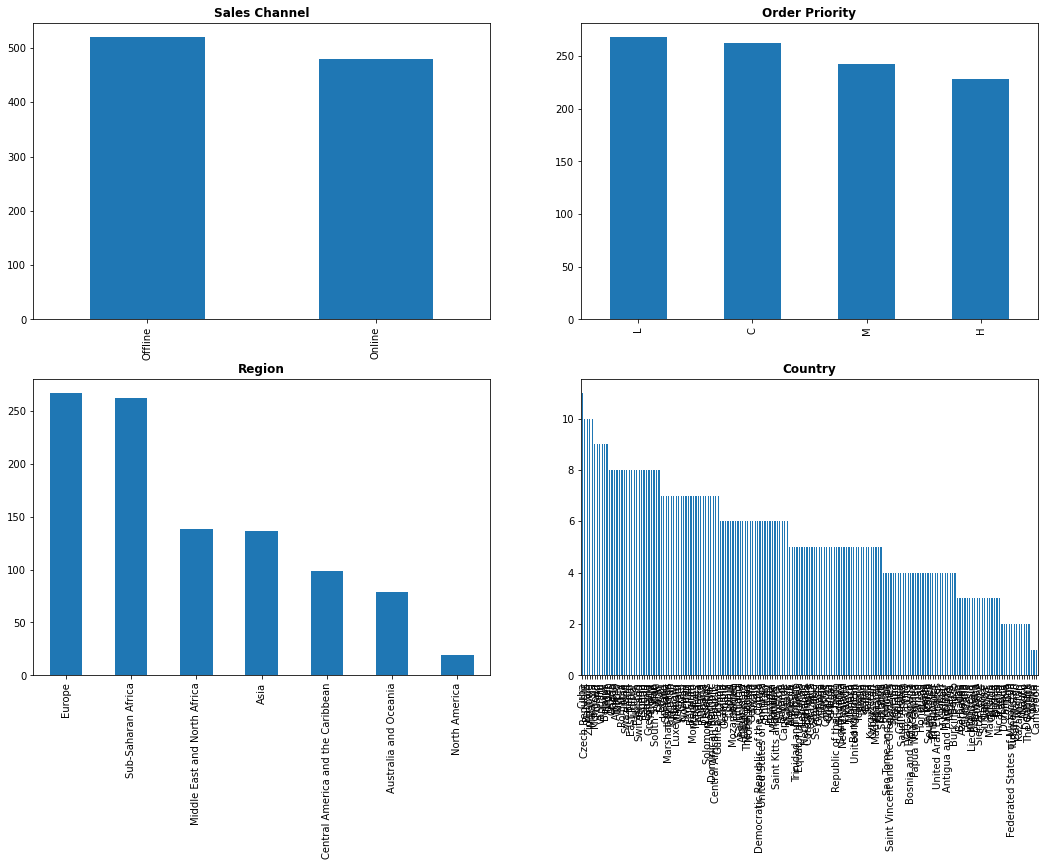

In [14]:
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 3)
plt.title('Region', fontweight='bold')
sales['Region'].value_counts().plot(kind='bar')

plt.subplot(2, 2, 4)
plt.title('Country', fontweight='bold')
sales['Country'].value_counts().plot(kind='bar')

plt.subplot(2, 2, 1)
plt.title('Sales Channel', fontweight='bold')
sales['Sales Channel'].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title('Order Priority', fontweight='bold')
sales['Order Priority'].value_counts().plot(kind='bar')

plt.show()

# Essay 

The `hr` and `sales` analyzed in the code above present a mock company's HR and sales data, respectively. The HR dataset is comprised of employee level information such as gender, time at the company, etc that could potentially be used to predict the employee's salary. A selection of 12 of the total 36 columns were chosen as possible predictors for employee salary, which included both numeric and categorical data. Of the machine learning methods we have covered thus far, only two are capable of making predictions on a continuous scale: linear regression and random forest regression. Since the `City` field in the HR dataset is a categorical variable with 17,878 categories 100,000 employees), one-hot encoding the data would create an extremely large number of variables, which could prove to be somewhat of a performance issue down the line for a linear regression model. While this could possibly be remidied by selecting only those one-hot encoded fields that correspond to major cities (i.e. Washington, Houston, New York City, etc.) it might make more sense to use the random forest regressor, since it has the unique ability of being able to operate on categorical variables directly (without any encoding). In addition, while this mock data is of high quality and does not include any null or missing information, random forests typically adapt well to more real-life scenarios in which that is not the case. 

The `sales` dataset as a whole provides a little less opportunity to make predictions due to the fact that many of the interesting fields can be perfectly derived via information in others (i.e. `Total Revenue` is simply `Unit Cost` multiplied by `Units Sold`). However, it might be useful for a company to try and predict the impact of an order that they know is about to be placed without having the full details of the type and quantity of units sold. For this reason, we could use the existing data to classify an order as "high impact" if its total profit is in the anywhere above the top 90th percentile of all orders made. Four of the fields (Region, Country, Sales Channel, Order Priority) could then be used to try and predict whether or not an order would be in this "high impact" category. This could enable the business to engage to better plan and divert resources before the full details of the order are made clear. Of the different classification algorithms we have covered (KNN, Random Forests, Decision Trees, Logistic Regression, LDA), logistic regression immediately popped out as a solid choice - it has a reputation of being used for high quality anomaly detection and generally performs well in binary classification problems as a whole. However, logistic regression typically also requires a large sample size (only 1,000 records in this case) and performs best when the predictors are continuous (which they are not). That being said, a descision tree or random forest (classifier version this time) might once again be the best choice - it will likely perform better with the smaller amount of data and does not require one hot encoding for the categorical variables.

While random forests might work well on both of the prediction problems presented here, it would be interesting as a next step to actually try testing some of the models out of the box to get some baseline results. 